# SPOTIFY DATASET ANALIYSIS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from Helpers.eda import*
from Helpers.data_prep import*

# Veriyi içeri aktarmak

In [2]:
veri= pd.read_csv("spotify.csv")
veri.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.058,0.102,0.000,0.065,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.037,0.072,0.004,0.357,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.074,0.079,0.000,0.110,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.102,0.029,0.000,0.204,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.036,0.080,0.000,0.083,0.725,123.976,189052


In [3]:
veri.shape

(32833, 23)

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.000,42.477,24.984,0.000,24.000,45.000,62.000,100.000
danceability,32833.000,0.655,0.145,0.000,0.563,0.672,0.761,0.983
energy,32833.000,0.699,0.181,0.000,0.581,0.721,0.840,1.000
key,32833.000,5.374,3.612,0.000,2.000,6.000,9.000,11.000
loudness,32833.000,-6.719,2.988,-46.448,-8.171,-6.166,-4.645,1.275
mode,32833.000,0.566,0.496,0.000,0.000,1.000,1.000,1.000
speechiness,32833.000,0.107,0.101,0.000,0.041,0.062,0.132,0.918
acousticness,32833.000,0.175,0.220,0.000,0.015,0.080,0.255,0.994
instrumentalness,32833.000,0.085,0.224,0.000,0.000,0.000,0.005,0.994
liveness,32833.000,0.190,0.154,0.000,0.093,0.127,0.248,0.996


In [6]:
veri.isnull().values.any()

True

In [7]:
veri.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
track_album_id      0
                   ..
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
Length: 23, dtype: int64

In [8]:
check_df(veri, head=5)

##################### Shape #####################
(32833, 23)
##################### Types #####################
track_id             object
track_name           object
track_artist         object
track_popularity      int64
track_album_id       object
                     ...   
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
Length: 23, dtype: object
##################### Head #####################
                 track_id                                         track_name      track_artist  track_popularity          track_album_id  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix      Zar

# Kategorik ve nümerik verilerin seçimi

In [9]:
grab_col_names(veri, cat_th=10, car_th=20)

Observations: 32833
Variables: 23
cat_cols: 2
num_cols: 12
cat_but_car: 9
num_but_cat: 1


(['playlist_genre', 'mode'],
 ['track_popularity',
  'danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'duration_ms'],
 ['track_id',
  'track_name',
  'track_artist',
  'track_album_id',
  'track_album_name',
  'track_album_release_date',
  'playlist_name',
  'playlist_id',
  'playlist_subgenre'])

# drop fonksiyonu ile sütunları çıkarma

In [10]:
df = veri.drop(["track_id","track_album_id","playlist_id"],axis=1) #axis=1 ssütun anlamında
df.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.058,0.102,0.000,0.065,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.037,0.072,0.004,0.357,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.074,0.079,0.000,0.110,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.102,0.029,0.000,0.204,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.036,0.080,0.000,0.083,0.725,123.976,189052


# sort ile track_popularity'e göre popülerlik sıralaması

In [11]:
df.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,-6.400,0,0.092,0.692,0.000,0.149,0.513,98.027,209438
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.824,0.588,6,-6.400,0,0.092,0.692,0.000,0.149,0.513,98.027,209438
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
23104,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
21468,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Contemporary Urban,r&b,urban contemporary,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15604,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,Hot Rocks 1964-1971,1971-12-20,Classic Hard Rock,rock,hard rock,0.723,0.841,9,-8.649,1,0.048,0.000,0.174,0.102,0.854,135.595,222800
4977,Stone,JOY.,0,Stone,2014-10-28,Indie Poptimism!,pop,indie poptimism,0.606,0.481,6,-11.940,1,0.059,0.096,0.003,0.098,0.094,124.880,230113
4975,Walk Away,LANY,0,Hot Lights,2014-04-22,Indie Poptimism!,pop,indie poptimism,0.323,0.382,10,-9.649,1,0.034,0.264,0.000,0.103,0.268,85.306,231692
11326,The Back Seat Of My Car,Paul McCartney,0,Wingspan (UK Version),2001-05-07,The Black Album,rock,album rock,0.266,0.522,10,-9.348,1,0.032,0.714,0.003,0.617,0.482,163.205,268533


# sort ile duration_ms'e göre sıralama

In [12]:
df.sort_values('duration_ms', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
21327,47 - Remix,Anuel AA,64,47 (Remix),2017-03-31,Los Cangri,latin,latin hip hop,0.711,0.699,6,-4.891,1,0.193,0.248,0.000,0.254,0.376,146.016,517810
12391,Kashmir - 2012 Remaster,Led Zeppelin,63,Physical Graffiti (Deluxe Edition),1975-02-24,Rock Classics,rock,classic rock,0.483,0.615,2,-8.538,1,0.050,0.452,0.000,0.051,0.594,80.576,517125
11770,Kashmir - 2012 Remaster,Led Zeppelin,63,Physical Graffiti (Deluxe Edition),1975-02-24,House Of The Rising Sun,rock,album rock,0.483,0.615,2,-8.538,1,0.050,0.452,0.000,0.051,0.594,80.576,517125
12379,American Pie,Don McLean,73,American Pie,1971,Rock Classics,rock,classic rock,0.531,0.481,4,-11.709,0,0.060,0.699,0.000,0.084,0.491,138.450,516893
20643,Jam On It (Re-Recorded Version),Newcleus,28,Jam On It (Re-Recorded Version),2009-01-01,80's Freestyle/Disco Dance Party (Set Crossfad...,latin,latin hip hop,0.875,0.785,1,-5.933,0,0.049,0.003,0.006,0.075,0.283,116.369,516760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24510,No Guarantee - Remix Version,Chico DeBarge,0,Long Time No See,1997-11-18,90s R&B - The BET Planet Groove/Midnight Love Mix,r&b,new jack swing,0.220,0.029,1,-34.283,1,0.056,0.943,0.000,0.218,0.038,128.899,31893
28142,Poison (Interlude),Tetengo,18,Electroshow,2018-06-21,House Electro 2019,edm,electro house,0.800,0.588,7,-7.240,1,0.077,0.095,0.826,0.108,0.907,128.068,31875
28161,The Reddish Flower,Rob Stepwart,13,Trip Stories,2018-11-27,House Electro 2019,edm,electro house,0.767,0.912,6,-9.466,1,0.199,0.003,0.854,0.090,0.604,126.059,31429
8339,The Screwed Up Click,DJ Screw & The Screwed Up Click,0,Fallen Soldiers,2008-02-12,3rd Coast Classics,rap,southern hip hop,0.514,0.720,1,-8.507,1,0.206,0.976,0.073,0.910,0.977,85.811,29493


# query() fonksiyonu ile filtreleme ve popülerliğe göre sıralama

In [13]:
df_pop = df.query('playlist_genre=="pop"')
df_pop
df_pop.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.824,0.588,6,-6.400,0,0.092,0.692,0.000,0.149,0.513,98.027,209438
1605,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.513,0.796,1,-4.075,1,0.063,0.001,0.000,0.094,0.345,171.017,201573
4713,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,indie poptimism🕺🏻,pop,indie poptimism,0.513,0.796,1,-4.075,1,0.063,0.001,0.000,0.094,0.345,171.017,201573
1300,Memories,Maroon 5,98,Memories,2019-09-20,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,post-teen pop,0.764,0.320,11,-7.209,1,0.055,0.837,0.000,0.082,0.575,91.019,189486
1301,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,post-teen pop,0.695,0.762,0,-3.497,1,0.040,0.192,0.002,0.086,0.553,120.042,215280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,When You Come Home,Trevor Dahl,0,When You Come Home,2015-11-27,random playlist that can't decide its genre so...,pop,indie poptimism,0.635,0.891,0,-3.913,1,0.026,0.005,0.000,0.074,0.484,105.000,228053
4883,Better Man,Little Big Town,0,Better Man,2016-10-20,random playlist that can't decide its genre so...,pop,indie poptimism,0.530,0.768,5,-4.178,1,0.035,0.127,0.000,0.238,0.432,143.902,260933
4877,Go,Grant Terry,0,Silent War,2014-05-06,random playlist that can't decide its genre so...,pop,indie poptimism,0.583,0.613,9,-4.786,0,0.041,0.031,0.000,0.064,0.815,204.068,218886
3428,Diamonds - Radio Edit,Hard Rain London,0,Diamonds EP,2010-11-22,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,0.470,0.913,11,-4.487,1,0.042,0.041,0.001,0.385,0.575,131.876,238678


In [14]:
df_rap = df.query('playlist_genre=="rap"')
df_rap
df_rap.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5508,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,rap,hip hop,0.896,0.586,10,-6.687,0,0.056,0.104,0.000,0.790,0.642,116.971,196653
9018,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,GTA San Andreas Radio Los Santos,rap,gangster rap,0.896,0.586,10,-6.687,0,0.056,0.104,0.000,0.790,0.642,116.971,196653
11184,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,Trap Americana,rap,trap,0.896,0.586,10,-6.687,0,0.056,0.104,0.000,0.790,0.642,116.971,196653
11113,Tusa,KAROL G,98,Tusa,2019-11-07,Trap 2020 🔥,rap,trap,0.803,0.715,2,-3.280,1,0.298,0.295,0.000,0.057,0.574,101.085,200960
9141,Falling,Trevor Daniel,97,Falling,2018-10-05,Gangsta Rap 💎 Rap Party,rap,gangster rap,0.784,0.430,10,-8.756,0,0.036,0.123,0.000,0.089,0.236,127.087,159382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8909,Fick dich,Hanybal,0,Fick dich,2017-10-04,Gangster Rap Deutsch,rap,gangster rap,0.939,0.754,0,-6.220,1,0.113,0.124,0.000,0.113,0.647,110.002,183354
7757,In The Nights,Damion,0,Good Vibes,2017-02-23,"🔥💵 Hip Hop, Rap, Heavy 808's - New School",rap,southern hip hop,0.803,0.636,10,-6.004,1,0.307,0.107,0.000,0.090,0.324,140.006,219840
8911,Haramstufe Rot,Hanybal,0,Haramstufe Rot,2016-09-16,Gangster Rap Deutsch,rap,gangster rap,0.520,0.828,1,-3.752,1,0.325,0.028,0.000,0.068,0.479,80.903,255004
8253,You The Boss,Rick Ross,0,You The Boss,2011-01-01,Contemporary Hip Hop,rap,southern hip hop,0.716,0.686,11,-6.555,1,0.145,0.007,0.000,0.145,0.532,141.043,280667


In [15]:
df_rock = df.query('playlist_genre=="rock"')
df_rock
df_rock.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
13900,bad guy,Billie Eilish,95,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,Permanent Wave,rock,permanent wave,0.701,0.425,7,-10.965,1,0.375,0.328,0.130,0.100,0.562,135.128,194088
14382,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,88,Spider-Man: Into the Spider-Verse (Soundtrack ...,2018-12-14,②⓪①⑨ mixed,rock,permanent wave,0.760,0.479,2,-5.574,1,0.047,0.556,0.000,0.070,0.913,89.911,158040
14539,The Less I Know The Better,Tame Impala,85,Currents,2015-07-17,permanent wave,rock,permanent wave,0.640,0.740,4,-4.083,1,0.028,0.011,0.007,0.167,0.785,116.879,216320
11798,The Less I Know The Better,Tame Impala,85,Currents,2015-07-17,House Of The Rising Sun,rock,album rock,0.640,0.740,4,-4.083,1,0.028,0.011,0.007,0.167,0.785,116.879,216320
14433,Dancin (feat. Luvli) - Krono Remix,Aaron Smith,84,Dancin (feat. Luvli) [Krono Remix],2014-11-07,②⓪①⑨ mixed,rock,permanent wave,0.720,0.741,10,-6.529,0,0.029,0.101,0.000,0.289,0.357,119.896,198053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,This Is the Time (Ballast),Nothing More,0,This Is the Time (Ballast),2014-03-11,New Hard Rock,rock,hard rock,0.521,0.982,11,-4.639,0,0.067,0.000,0.017,0.095,0.425,110.030,220413
11451,Vivid,T-SQUARE,0,Paradise,2015-07-08,City Pop 1985 シティーポップ,rock,album rock,0.571,0.802,0,-7.553,1,0.039,0.048,0.340,0.336,0.910,150.008,265347
11718,Deep Child,Solstice Coil,0,A Prescription for Paper Cuts,2005-01-01,Progressive Rock / Metal - Rock /Metal Progre...,rock,album rock,0.422,0.887,11,-6.095,0,0.065,0.037,0.154,0.135,0.409,133.640,375453
13192,Fafa,Vieux Farka Touré,0,Fondo,2009-05-26,Afro Psychedelica,rock,classic rock,0.441,0.611,10,-5.610,1,0.031,0.744,0.295,0.168,0.350,92.581,303227


In [16]:
df_latin = df.query('playlist_genre=="latin"')
df_latin
df_latin.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,-6.400,0,0.092,0.692,0.000,0.149,0.513,98.027,209438
20092,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,latin,latin hip hop,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
19715,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop,0.513,0.796,1,-4.075,1,0.063,0.001,0.000,0.094,0.345,171.017,201573
19740,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop,0.695,0.762,0,-3.497,1,0.040,0.192,0.002,0.086,0.553,120.042,215280
18307,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin pop,0.513,0.796,1,-4.075,1,0.063,0.001,0.000,0.094,0.345,171.017,201573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19962,A Day In My Life (Without You),Lisette Melendez,0,Greatest Hits,2000,Latin Hip Hop/Freestyle,latin,latin hip hop,0.606,0.947,6,-4.446,0,0.037,0.001,0.314,0.051,0.789,119.104,235040
20529,Love Yuh Everything,Alkaline,0,Love Yuh Everything - Single,2015-05-05,Latin/Hip Hop/Dancehall/Soca,latin,latin hip hop,0.746,0.733,6,-6.376,0,0.124,0.378,0.000,0.124,0.539,100.168,165026
19963,Together Forever,Lisette Melendez,0,Greatest Hits,2000,Latin Hip Hop/Freestyle,latin,latin hip hop,0.682,0.963,11,-4.046,1,0.057,0.019,0.072,0.344,0.710,118.937,345800
19964,About Last Night,Miguel Reyes,0,May & Everything After,1996,Latin Hip Hop/Freestyle,latin,latin hip hop,0.737,0.667,9,-13.510,0,0.067,0.016,0.820,0.158,0.948,120.061,307800


In [17]:
df_rb = df.query('playlist_genre=="r&b"')
df_rb
df_rb.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
21468,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Contemporary Urban,r&b,urban contemporary,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
23104,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
23100,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.896,0.586,10,-6.687,0,0.056,0.104,0.000,0.790,0.642,116.971,196653
23103,Tusa,KAROL G,98,Tusa,2019-11-07,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.803,0.715,2,-3.280,1,0.298,0.295,0.000,0.057,0.574,101.085,200960
22933,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,Pop Hits 2020,r&b,hip pop,0.513,0.796,1,-4.075,1,0.063,0.001,0.000,0.094,0.345,171.017,201573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24298,Got to Have Your Love,Mantronix,0,"Classic R'n'B Special 90's, Vol. 3",1996,90's NEW JACK SWING,r&b,new jack swing,0.789,0.817,11,-7.199,1,0.068,0.108,0.008,0.060,0.952,110.099,181081
26310,Hollywood,LemKuuja,0,CHEESECAKE+,2018-06-30,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,neo soul,0.754,0.723,11,-9.114,0,0.203,0.002,0.117,0.632,0.529,110.026,259673
26311,Keep On Baby!,LemKuuja,0,CHEESECAKE+,2018-06-30,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,neo soul,0.738,0.846,7,-6.393,1,0.260,0.032,0.000,0.136,0.571,120.008,194668
26312,November,LemKuuja,0,CHEESECAKE+,2018-06-30,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,neo soul,0.781,0.788,2,-5.965,1,0.202,0.001,0.891,0.224,0.880,115.090,219712


In [18]:
df_edm = df.query('playlist_genre=="edm"')
df_edm
df_edm.sort_values('track_popularity', axis = 0, ascending = False)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.621,0.601,6,-5.616,0,0.148,0.052,0.000,0.460,0.457,116.735,163636
30207,Memories,Maroon 5,98,Memories,2019-09-20,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.764,0.320,11,-7.209,1,0.055,0.837,0.000,0.082,0.575,91.019,189486
30209,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.695,0.762,0,-3.497,1,0.040,0.192,0.002,0.086,0.553,120.042,215280
30197,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.896,0.586,10,-6.687,0,0.056,0.104,0.000,0.790,0.642,116.971,196653
30203,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.513,0.796,1,-4.075,1,0.063,0.001,0.000,0.094,0.345,171.017,201573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31682,Easy Does It,Harrison BDP,0,Be Like Water,2018-06-25,House/Electro/Progressive/Disco/Lofi/Synthwave,edm,progressive electro house,0.773,0.578,8,-11.772,1,0.052,0.014,0.827,0.331,0.463,126.002,386781
31403,Kaleidoscope,Vicetone,0,Kaleidoscope,2016-11-04,Female Vocal EDM,edm,progressive electro house,0.610,0.808,5,-4.018,0,0.038,0.499,0.000,0.090,0.419,122.943,214787
32264,Higher Place (feat. Ne-Yo) - Afrojack Remix,Dimitri Vegas & Like Mike,0,Higher Place (Afrojack Remix),2015-12-28,"Electrónica, Progressive House, Electro House ...",edm,progressive electro house,0.567,0.598,0,-9.925,1,0.050,0.319,0.001,0.089,0.601,127.988,195586
32265,Hollow,DubVision,0,Hollow,2015-08-21,"Electrónica, Progressive House, Electro House ...",edm,progressive electro house,0.489,0.860,0,-4.214,0,0.084,0.026,0.000,0.401,0.119,127.991,211250


# Unique sanatçı sayısı

In [19]:
artists=pd.unique(veri.track_artist)
print("Unique artists sayısı: {}".format(len(artists)))
artists[:10]

Unique artists sayısı: 10693


array(['Ed Sheeran', 'Maroon 5', 'Zara Larsson', 'The Chainsmokers',
       'Lewis Capaldi', 'Katy Perry', 'Sam Feldt', 'Avicii',
       'Shawn Mendes', 'Ellie Goulding'], dtype=object)

# En popüler sanatçılar

In [20]:
top_five_artists=df.groupby("track_artist").count().sort_values(by="track_popularity", ascending=False)["track_popularity"]
top_five_artists

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Men Without Hats      1
Memphis May Fire      1
Memphis Bleek         1
Melvin Ayala          1
香取慎吾                  1
Name: track_popularity, Length: 10692, dtype: int64

# Unique playlist_genre sayısı

In [21]:
genre = pd.unique(veri.playlist_genre)
print("Unique playlist_genre sayısı: {}".format(len(genre)))
genre[:10]

Unique playlist_genre sayısı: 6


array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

# Unique playlist_subgenre sayısı

In [22]:
subgenre = pd.unique(veri.playlist_subgenre)
print("Unique playlist_genre sayısı: {}".format(len(subgenre)))
subgenre[:10]

Unique playlist_genre sayısı: 24


array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock'], dtype=object)

# Müzik türlerinin alt türlerinin popüleriteye göre incelenmesi

In [23]:
a=df.groupby(["playlist_genre","playlist_subgenre"]).agg({"track_popularity": "count"})
#pd.set_option('display.max_rows', None) -> yazdırmadan tüm satırları görme
print(a)

                                          track_popularity
playlist_genre playlist_subgenre                          
edm            big room                               1206
               electro house                          1511
               pop edm                                1517
               progressive electro house              1809
latin          latin hip hop                          1656
...                                                    ...
rap            trap                                   1291
rock           album rock                             1065
               classic rock                           1296
               hard rock                              1485
               permanent wave                         1105

[24 rows x 1 columns]


# Müzik türlerinin bölümlere ayrılması

In [24]:
pop=df[df.playlist_genre=="pop"]
pop.head(3)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.058,0.102,0.000,0.065,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.037,0.072,0.004,0.357,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.074,0.079,0.000,0.110,0.613,124.008,176616


In [25]:
rap=df[df.playlist_genre=='rap']
rap.head(3)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5507,Life Is Good (feat. Drake),Future,93,Life Is Good (feat. Drake),2020-01-10,RapCaviar,rap,hip hop,0.676,0.609,2,-5.831,0,0.481,0.071,0.000,0.152,0.508,142.037,237735
5508,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,rap,hip hop,0.896,0.586,10,-6.687,0,0.056,0.104,0.000,0.790,0.642,116.971,196653
5509,I Can See,Mac Miller,73,Circles,2020-01-17,RapCaviar,rap,hip hop,0.699,0.503,5,-9.922,0,0.088,0.391,0.013,0.100,0.055,114.860,220853


In [26]:
latin=df[df.playlist_genre=="latin"]
latin.head(3)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16204,Silverskin,Sam Feldt,8,Sunrise To Sunset,2017-11-24,Tropical House,latin,tropical,0.749,0.520,10,-8.604,1,0.046,0.224,0.001,0.098,0.759,96.023,151219
16205,Recognise,Lost Frequencies,60,Recognise,2019-03-08,Tropical House,latin,tropical,0.717,0.741,10,-6.645,0,0.053,0.155,0.000,0.133,0.188,105.997,186062
16206,Handful Of Gold - Hounded Remix,CAZZETTE,50,Handful Of Gold (Remixes II),2017-07-21,Tropical House,latin,tropical,0.735,0.585,1,-9.673,1,0.048,0.120,0.000,0.073,0.130,120.008,250000


In [27]:
edm=df[df.playlist_genre=="edm"]
edm.head(3)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
26790,"Disease - KATFYR ""Tokyo Bound"" Remix",Naeleck,43,Disease,2013-09-16,Electro House 2020,edm,electro house,0.677,0.926,0,-3.307,1,0.046,0.003,0.507,0.337,0.108,128.014,288867
26791,Infinite Ammo,Le Castle Vania,46,Payday,2015-10-23,Electro House 2020,edm,electro house,0.597,0.960,7,-1.940,0,0.063,0.000,0.890,0.325,0.144,127.016,232637
26792,WOW,Tiësto,10,WOW,2018-08-24,Electro House 2020,edm,electro house,0.601,0.990,6,-3.016,1,0.337,0.001,0.520,0.124,0.192,127.958,148125


In [28]:
rb=df[df.playlist_genre=="r&b"]
rb.head(3)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
21359,Life Is Good (feat. Drake),Future,93,Life Is Good (feat. Drake),2020-01-10,New Hip Hop‏‏​​ ‍,r&b,urban contemporary,0.676,0.609,2,-5.831,0,0.481,0.071,0.000,0.152,0.508,142.037,237735
21360,Ayy Macarena,Tyga,91,Ayy Macarena,2019-11-13,New Hip Hop‏‏​​ ‍,r&b,urban contemporary,0.816,0.630,2,-5.568,1,0.226,0.133,0.000,0.069,0.715,96.493,131607
21361,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,JACKBOYS,2019-12-27,New Hip Hop‏‏​​ ‍,r&b,urban contemporary,0.559,0.491,2,-6.406,0,0.035,0.057,0.000,0.099,0.114,153.131,244874


In [29]:
rock=df[df.playlist_genre=="rock"]
rock.head(3)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11253,Paradise City,Guns N' Roses,78,Appetite For Destruction,1987-01-01,This Is Guns N' Roses,rock,album rock,0.273,0.952,11,-8.762,1,0.084,0.017,0.011,0.142,0.475,100.269,405640
11254,Shadow Of Your Love,Guns N' Roses,58,Shadow Of Your Love,2018-05-04,This Is Guns N' Roses,rock,album rock,0.416,0.995,10,-5.376,0,0.119,0.000,0.090,0.340,0.330,112.014,185573
11255,Welcome To The Jungle,Guns N' Roses,78,Appetite For Destruction,1987-01-01,This Is Guns N' Roses,rock,album rock,0.446,0.954,8,-8.069,1,0.076,0.023,0.395,0.297,0.332,123.450,272027


# Müzik türerinin ikili ilişkilerinin grafikler halinde incelenmesi

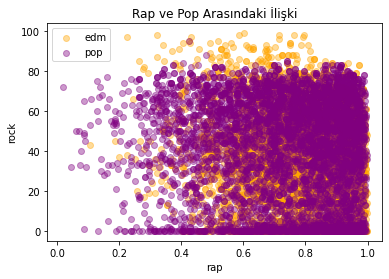

In [30]:
plt.figure()
plt.scatter(edm.energy, edm.track_popularity, alpha =0.4, label= "edm", color="orange")
plt.scatter(rock.energy, rock.track_popularity, alpha =0.4, label= "pop", color= "purple")
plt.xlabel("rap")
plt.ylabel("rock")
plt.title("Rap ve Pop Arasındaki İlişki")
plt.legend()
plt.show()

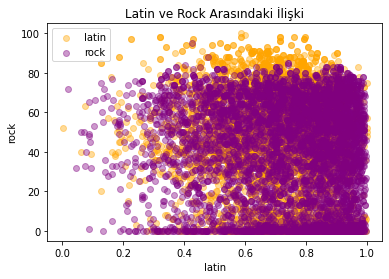

In [31]:
plt.figure()
plt.scatter(latin.energy, latin.track_popularity, alpha =0.4, label= "latin", color="orange")
plt.scatter(rock.energy, rock.track_popularity, alpha =0.4, label= "rock", color= "purple")
plt.xlabel("latin")
plt.ylabel("rock")
plt.title("Latin ve Rock Arasındaki İlişki")
plt.legend()
plt.show()

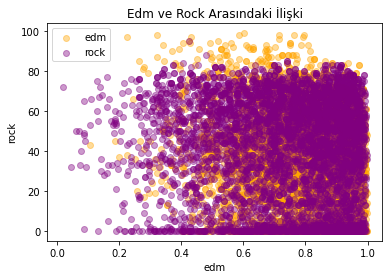

In [32]:
plt.figure()
plt.scatter(edm.energy, edm.track_popularity, alpha =0.4, label= "edm", color="orange")
plt.scatter(rock.energy, rock.track_popularity, alpha =0.4, label= "rock", color= "purple")
plt.xlabel("edm")
plt.ylabel("rock")
plt.title("Edm ve Rock Arasındaki İlişki")
plt.legend()
plt.show()

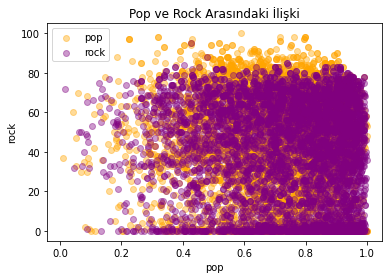

In [33]:
plt.figure()
plt.scatter(pop.energy, pop.track_popularity, alpha =0.4, label= "pop", color="orange")
plt.scatter(rock.energy, rock.track_popularity, alpha =0.4, label= "rock", color= "purple")
plt.xlabel("pop")
plt.ylabel("rock")
plt.title("Pop ve Rock Arasındaki İlişki")
plt.legend()
plt.show()

# track_popularity'nin %20'lik bölümlere ayrılması

In [34]:
agg_df=df["new_track_popularity"]=pd.cut(df["track_popularity"],[0,20,40,60,80,100]).apply(str).str.replace(",","_")
agg_df

0        (60_ 80]
1        (60_ 80]
2        (60_ 80]
3        (40_ 60]
4        (60_ 80]
           ...   
32828    (40_ 60]
32829     (0_ 20]
32830     (0_ 20]
32831     (0_ 20]
32832    (20_ 40]
Name: track_popularity, Length: 32833, dtype: object

# müzik türlerine göre track_popularity pivot tablosu çizdirilmesi

In [35]:
df_pivot = df.pivot_table(index = "playlist_genre", columns= "new_track_popularity",
                             values= ["energy", "tempo", "valence"],
                             aggfunc={"energy":np.mean,"tempo":np.mean,"valence":[min, max, np.std]})
df_pivot.head()

energy                                        tempo                                      valence                                               \
                        mean                                         mean                                          max                                          min   
new_track_popularity (0_ 20] (20_ 40] (40_ 60] (60_ 80] (80_ 100] (0_ 20] (20_ 40] (40_ 60] (60_ 80] (80_ 100] (0_ 20] (20_ 40] (40_ 60] (60_ 80] (80_ 100] (0_ 20]   
playlist_genre                                                                                                                                                        
edm                    0.814    0.804    0.804    0.776     0.642 126.136  125.887  125.920  124.311   116.709   0.974    0.979    0.983    0.967     0.969   0.029   
latin                  0.738    0.694    0.700    0.714     0.654 117.703  118.451  117.605  120.474   119.301   0.974    0.972    0.976    0.976     0.950   0.047   
pop                    0.702    0.688    0.701    0.706     0.652 120.198  121.610  120.310  120.115   119.368   0.970    0.967    0.981    0.976     0.969   0.036   
r&b                    0.596    0.602    0.582    0.571     0.582 112.899  113.410  114.048  114.850   119.887   0.974    0.984    0.990    0.970     0.962   0.037   
rap                    0.669    0.671    0.628    0.649     0.610 120.880  120.024  120.071  122.644   126.830   0.977    0.975    0.972    0.970     0.962   0.036   

                                                                                                        
                                                              std                                       
new_track_popularity (20_ 40] (40_ 60] (60_ 80] (80_ 100] (0_ 20] (20_ 40] (40_ 60] (60_ 80] (80_ 100]  
playlist_genre                                                                                          
edm                     0.028    0.028    0.039     0.060   0.222    0.226    0.225    0.223     0.225  
latin                   0.038    0.000    0.000     0.060   0.228    0.233    0.225    0.208     0.222  
pop                     0.028    0.035    0.049     0.060   0.227    0.223    0.223    0.209     0.212  
r&b                     0.038    0.038    0.037     0.053   0.225    0.226    0.225    0.227     0.220  
rap                     0.034    0.029    0.037     0.060   0.221    0.233    0.225    0.218     0.222

# Büyük datasetlerin basit forma indirgenmesi

In [36]:
sample_df=df.sample(int(0.004*len(df)))
len(sample_df)

131

# energy ve loudness arasındaki ilişkinin incelenmesi

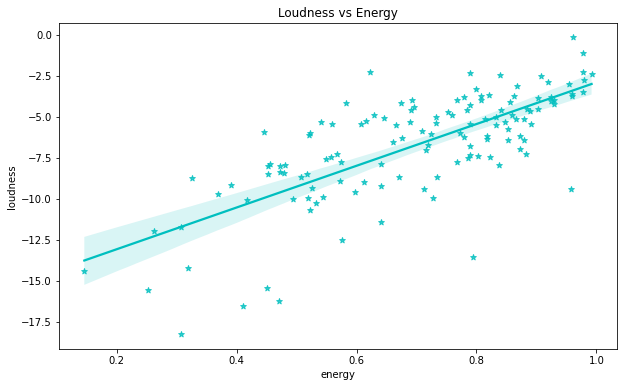

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(data= sample_df, y="loudness", x="energy",color="c", marker="*").set(title= "Loudness vs Energy")
plt.show()

# liveness ve loudness arasındaki ilişkinin incelenmesi

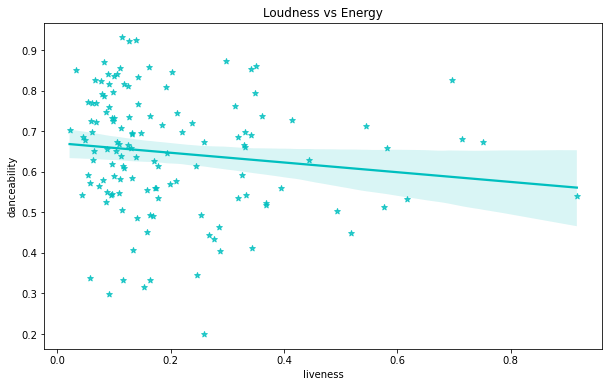

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(data= sample_df, y="danceability", x="liveness",color="c", marker="*").set(title= "Loudness vs Energy")
plt.show()

# track_popularity ve energy arasındaki ilişkinin incelenmesi

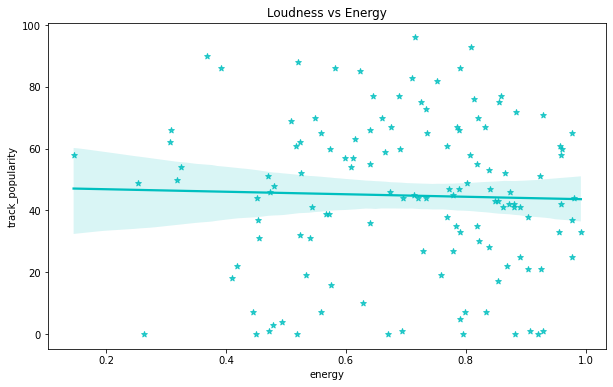

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(data= sample_df, y="track_popularity", x="energy",color="c", marker="*").set(title= "Loudness vs Energy")
plt.show()

# Barplot(Çubuk) Grafiklerinin çizdirilmesi

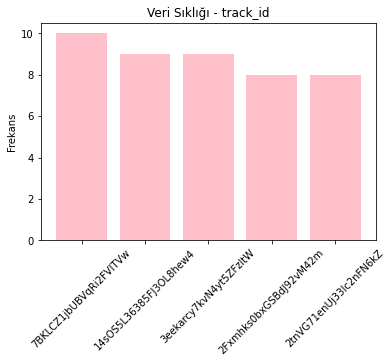

track_id: 
 7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
Name: track_id, dtype: int64


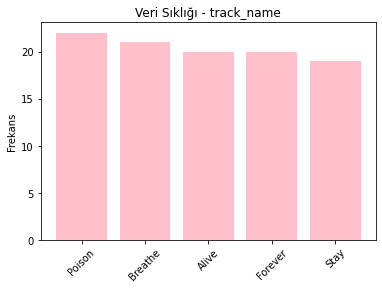

track_name: 
 Poison     22
Breathe    21
Alive      20
Forever    20
Stay       19
Name: track_name, dtype: int64


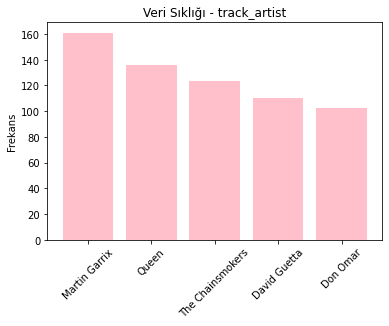

track_artist: 
 Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
Name: track_artist, dtype: int64


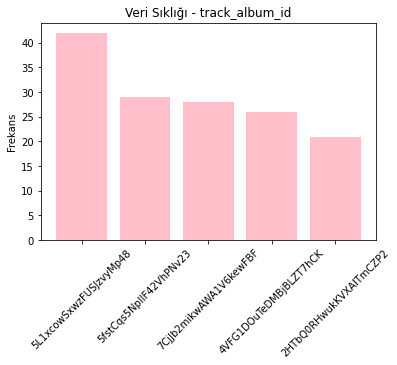

track_album_id: 
 5L1xcowSxwzFUSJzvyMp48    42
5fstCqs5NpIlF42VhPNv23    29
7CjJb2mikwAWA1V6kewFBF    28
4VFG1DOuTeDMBjBLZT7hCK    26
2HTbQ0RHwukKVXAlTmCZP2    21
Name: track_album_id, dtype: int64


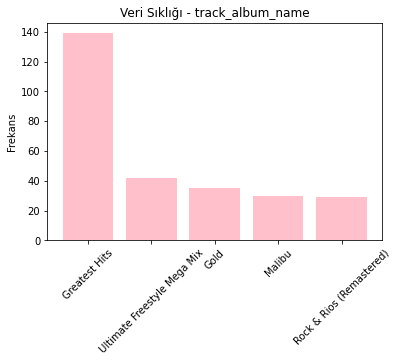

track_album_name: 
 Greatest Hits                  139
Ultimate Freestyle Mega Mix     42
Gold                            35
Malibu                          30
Rock & Rios (Remastered)        29
Name: track_album_name, dtype: int64


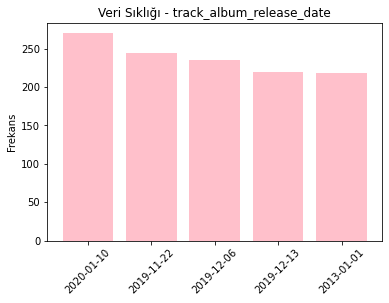

track_album_release_date: 
 2020-01-10    270
2019-11-22    244
2019-12-06    235
2019-12-13    220
2013-01-01    219
Name: track_album_release_date, dtype: int64


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


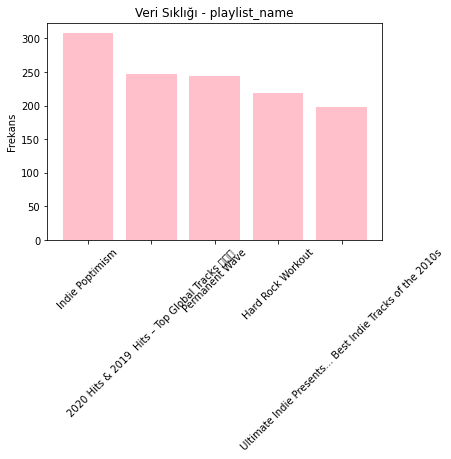

playlist_name: 
 Indie Poptimism                                              308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               247
Permanent Wave                                               244
Hard Rock Workout                                            219
Ultimate Indie Presents... Best Indie Tracks of the 2010s    198
Name: playlist_name, dtype: int64


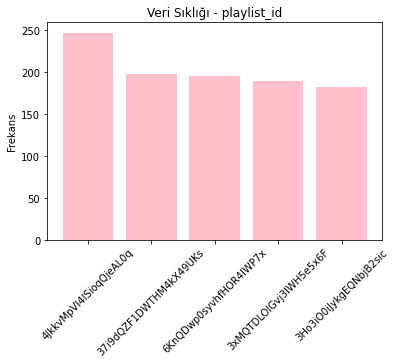

playlist_id: 
 4JkkvMpVl4lSioqQjeAL0q    247
37i9dQZF1DWTHM4kX49UKs    198
6KnQDwp0syvhfHOR4lWP7x    195
3xMQTDLOIGvj3lWH5e5x6F    189
3Ho3iO0iJykgEQNbjB2sic    182
Name: playlist_id, dtype: int64


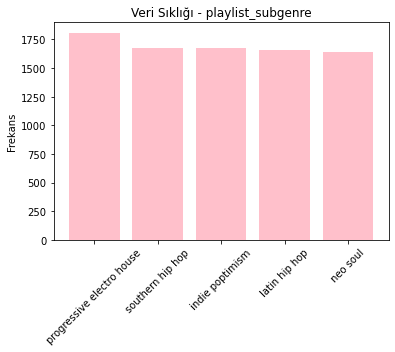

playlist_subgenre: 
 progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
Name: playlist_subgenre, dtype: int64


In [40]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
               n= Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk Grafiği
    """
    veri_sayma =veri[degisken]
    veri_sayma = veri_sayma.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma , color= "pink")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))
    
kategorik_degisken = ['track_id','track_name','track_artist','track_album_id','track_album_name','track_album_release_date',
                      'playlist_name','playlist_id','playlist_subgenre' ]
for i in kategorik_degisken:
    plotBar(i)

# histogram grafikleinin çizdirilmesi

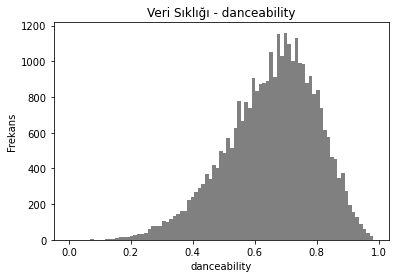

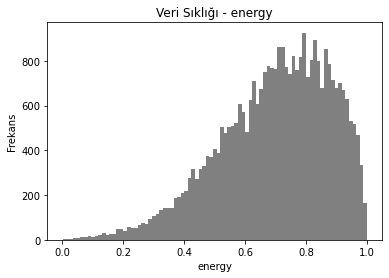

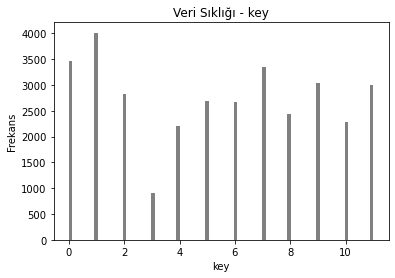

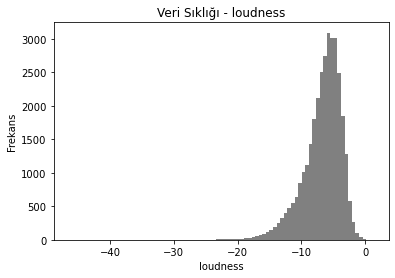

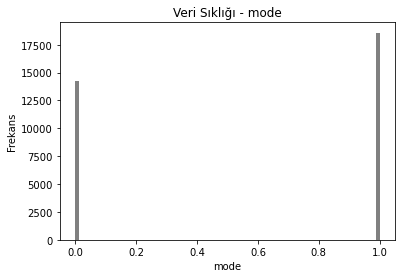

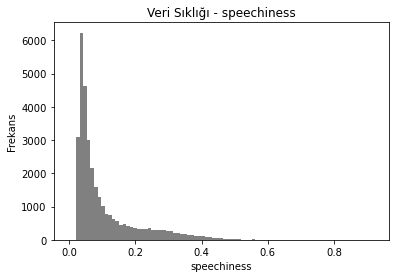

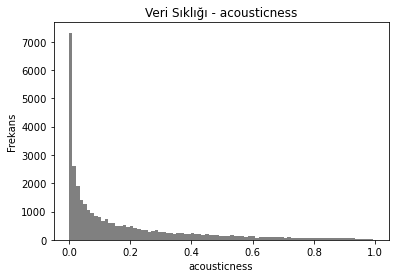

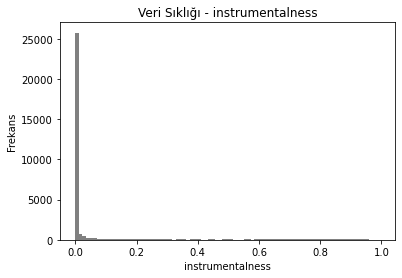

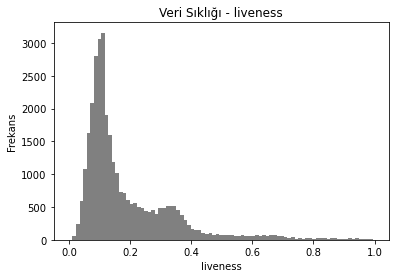

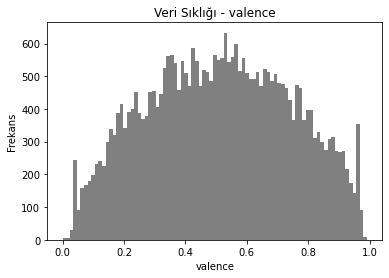

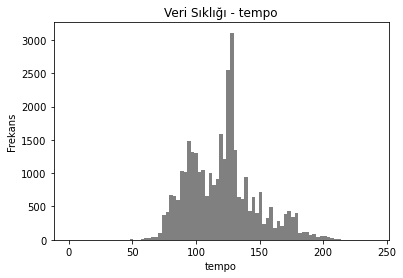

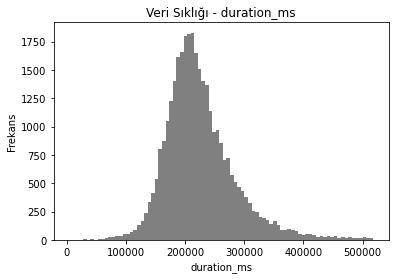

In [41]:
def plotHistogram(degisken):
    """
        Girdi: Değisken / sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(veri[degisken], bins=85, color = "grey")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    
# tüm sayısal dğişkenler için histogramların çizilmesi
sayisal_degisken = ["danceability", "energy", "key", "loudness", "mode","speechiness","acousticness",
                    "instrumentalness","liveness","valence","tempo","duration_ms"]
for i in sayisal_degisken:
    plotHistogram(i)

# Sayısal Sütunlar Arasında İlişki İncelemesi - Heatmap Grafiği

Text(0.5, 1.0, 'Correlation between variables')

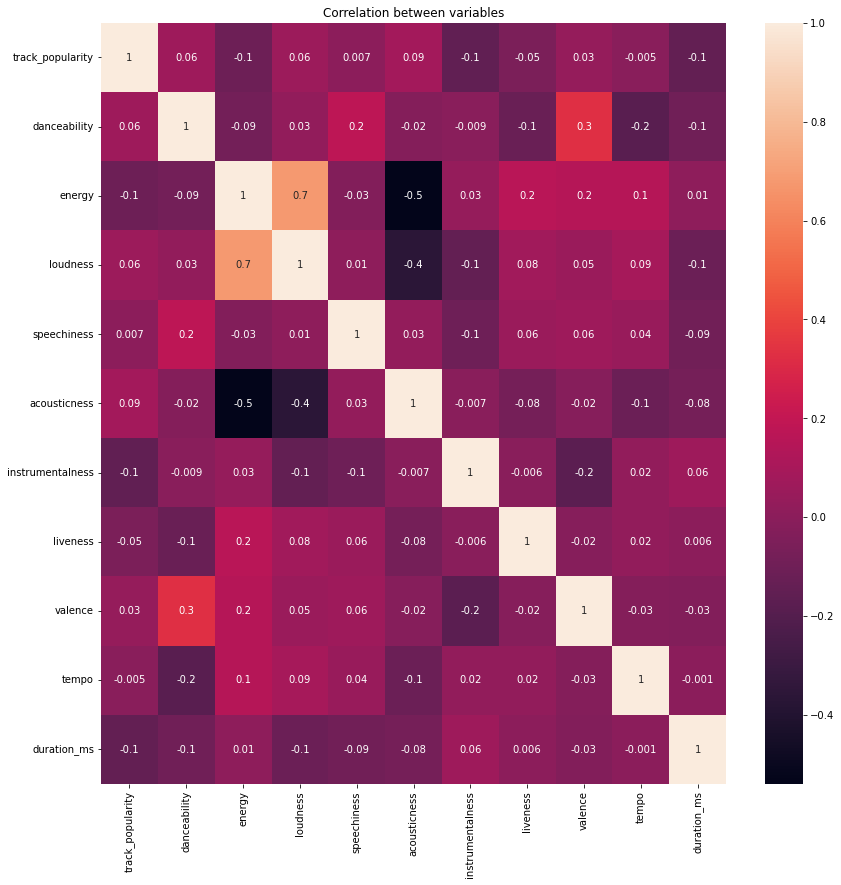

In [42]:
corr_df=df.drop(["key","mode"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,14))
heatmap = sns.heatmap(corr_df,annot=True,fmt='.1g')
heatmap.set_title("Correlation between variables")

# Boxplot grafiği çizdirilmesi ile aykırı değerleri inceleme

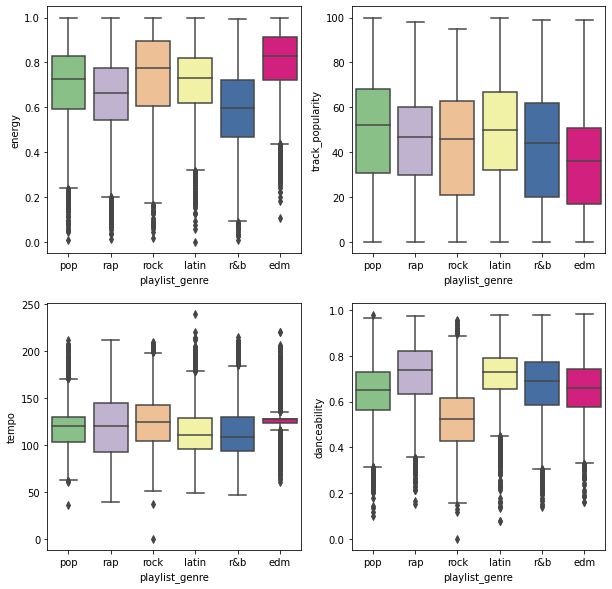

In [43]:
def graph(y):
    sns.boxplot(x="playlist_genre", y=y, data=veri,
               palette="Accent")
  
plt.figure(figsize=(10,10))

plt.subplot(221)
graph('energy')

plt.subplot(222)
graph('track_popularity')

plt.subplot(223)
graph('tempo')

plt.subplot(224)
graph('danceability')
  
plt.show()

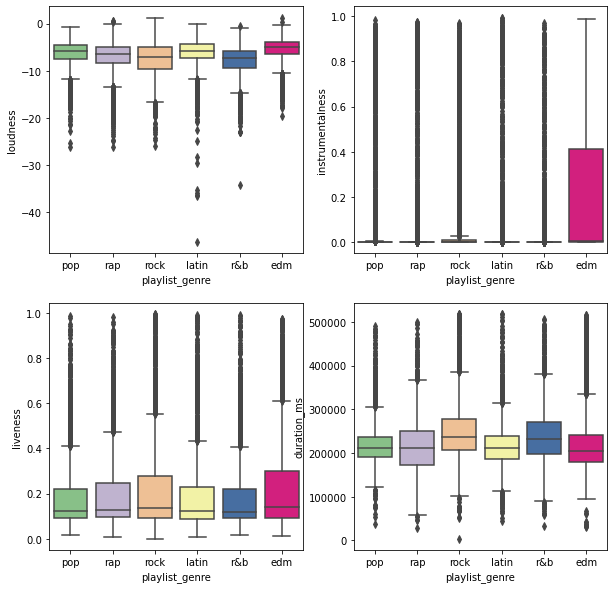

In [44]:
def graph(y):
    sns.boxplot(x="playlist_genre", y=y, data=veri,
               palette="Accent")
  
plt.figure(figsize=(10,10))

plt.subplot(221)
graph('loudness')

plt.subplot(222)
graph('instrumentalness')

plt.subplot(223)
graph('liveness')

plt.subplot(224)
graph('duration_ms')
  
plt.show()

# outlier threshold'ların belirlenmesi, buna göre aykırı değer olup olmadığının kontrolü ve aykırı değer varsa sime ve sınır değerlerle doldurma işlemlerinin gerçekleştirilmesi

In [45]:
outlier_thresholds(df, "tempo")

(-18.250499999999988, 266.8447)

In [46]:
check_outlier(df,"tempo")

False

In [47]:
outlier_thresholds(df, "instrumentalness")

(-0.528, 0.88)

In [48]:
check_outlier(df,"instrumentalness")

True

In [49]:
grab_outliers(veri, "instrumentalness")

                   track_id              track_name              track_artist  track_popularity          track_album_id                           track_album_name  \
342  67FPUOM5Q2sSvS3iqLxSFs                   Penny  Dimitri Vangelis & Wyman                50  19TAr9aIXmY4TGm1V5HrIK                                      Penny   
502  0PCRR19Pf4iiuvSrPxtQ0x                Sunshine              David Guetta                54  4bTjdxhRRUiWfwj200f9Kl    Nothing but the Beat (Ultimate Edition)   
748  24CXuh2WNpgeSYUOvz14jk  Sandstorm - Radio Edit                    Darude                61  3EWyQlR8LFyu6FImQT49bv                           Before The Storm   
819  6PUzxtIHkv346yP89NzP9X           Kernkraft 400             Zombie Nation                47  2qmrRoUZQemrKFr9PBMDHd                 Kernkraft 400 Single Mixes   
834  1pUFYb9peWkK8m1WCKNRjp             God Is a DJ                 Faithless                57  2Vcq2BbEjHFdfodZ8hlcZL  Forever Faithless - The Greatest Hits (C)   

   

In [50]:
#uç değerlerle değiştirme ile çözümleme
replace_with_thresholds(df, "instrumentalness")
df.shape

(32833, 21)

In [51]:
outlier_thresholds(df, "liveness")

(-0.3874499999999989, 0.8289499999999981)

In [52]:
check_outlier(df,"liveness")

True

In [53]:
grab_outliers(veri, "liveness")

                    track_id                                track_name          track_artist  track_popularity          track_album_id  \
188   65mOk4n0tfrMysFXu12ufx                       Don't Waste My Time                Kharfi                46  4n7kOauHRMuQ97McSDr0zm   
447   5WrEilrRI5cIW0DxMvQYPZ                                   Jopping                SuperM                75  1C1qYeSC9RdgbrKXpZCTSJ   
756   1bttWPpJQmn9zdi951BcAZ                               Be My Lover             La Bouche                13  4iRt5STyQudfgvq3Gt2ki6   
1616  1wFRkVclQWfMQQcaVLjmBE  If I'm James Dean, You're Audrey Hepburn  Sleeping With Sirens                60  0AMC1Y0J0a5yN7lkOSWrJr   
1814  5jlsg7onynIipVy5krMaRZ                                      Hair            Little Mix                64  6HmxS6CD2IUZZg1Oxu8AVh   

                       track_album_name track_album_release_date             playlist_name             playlist_id playlist_genre playlist_subgenre  danceability  \
188   

In [54]:
replace_with_thresholds(df, "liveness")
df.shape

(32833, 21)

In [55]:
outlier_thresholds(df, "duration_ms")

(-42579.80000000002, 505778.60000000003)

In [56]:
check_outlier(df,"duration_ms")

True

In [57]:
grab_outliers(veri, "duration_ms")

                     track_id                                       track_name   track_artist  track_popularity          track_album_id  \
11674  1N0tGBaY1qyZ7GLBoggpNi                                        Frequency             IQ                32  1OFVHUjIWdHrYvphwz4W8z   
11678  4IcEBPHjmpQIRk1WZKfOdO                             The First Rebreather  Big Big Train                30  2tFDYqrHzWM7AB4S70x5qL   
11681  5PsCkpjTbGl6Z3BHwFHRMJ                                       Hypocrites   Dave Kerzner                 7  4LTWar8Aj1wtNelfy5Dhwe   
11770  6Vjk8MNXpQpi0F4BefdTyq                          Kashmir - 2012 Remaster   Led Zeppelin                63  26tH0kjUhkxBEd3ipGkx3Y   
11824  7iLGljK0LNpGamQQEOuCRC  Won't Get Fooled Again - Original Album Version        The Who                15  5tqJNAjU163MfKLIP6DtYu   

                         track_album_name track_album_release_date                                      playlist_name             playlist_id playlist_genre  \
11674

In [58]:
# Silme ile remove_outlier çözümleme:
remove_outlier(veri, "duration_ms")

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.058,0.102,0.000,0.065,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.037,0.072,0.004,0.357,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.074,0.079,0.000,0.110,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.102,0.029,0.000,0.204,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.036,0.080,0.000,0.083,0.725,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.094,0.077,0.000,0.067,0.210,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.042,0.002,0.004,0.375,0.400,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.048,0.108,0.000,0.150,0.436,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.109,0.008,0.127,0.343,0.308,128.008,367432


In [59]:
outlier_thresholds(df, "energy")

(-0.25700000000000006, 1.6230000000000002)

In [60]:
check_outlier(df,"energy")

False

In [61]:
outlier_thresholds(df, "danceability")

(-0.10499999999999993, 1.391)

In [62]:
check_outlier(df,"danceability")

False

# Temizlenmiş verinin kaydedilmesi

In [63]:
df.to_csv("temizlenmiş.csv", index = False )